In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import neattext.functions as nfx
import numpy as np

c:\Users\DELL\anaconda3\envs\Ironhack\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [3]:
df_train=pd.read_csv(r"../final\train.txt",delimiter=';', header=None, names=['sentence','label'])
df_train.head()
df_val = pd.read_csv(r"../final\val.txt",delimiter=';',names=['text','label']).head()
df_val

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [4]:
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)

In [5]:
df.to_csv("wordfile.csv")

In [6]:
df.head()

,sentence,label,text
0,i didnt feel humiliated,sadness,NaN
1,i can go from feeling so hopeless to so damned...,sadness,NaN
2,im grabbing a minute to post i feel greedy wrong,anger,NaN
3,i am ever feeling nostalgic about the fireplac...,love,NaN
4,i am feeling grouchy,anger,NaN


In [7]:
print("Shape of the DataFrame:",df.shape)
df.sample(5)

Shape of the DataFrame: (16005, 3)


,sentence,label,text
12567,i feel about him and how he affects me and peo...,anger,NaN
1016,i think of how much time we spent just doing f...,surprise,NaN
12324,i feel that someone is trying to pry out of my...,joy,NaN
6836,i know that i will find a job and god has a pl...,fear,NaN
5326,i feel like i should try to calm her down shes...,joy,NaN


In [8]:
df.drop(columns=['text'],inplace=True)

In [9]:
df.sentence.astype(str)
df.head()


,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [10]:
df.isnull().sum()
df.fillna('Sad',inplace=True)

<AxesSubplot:>

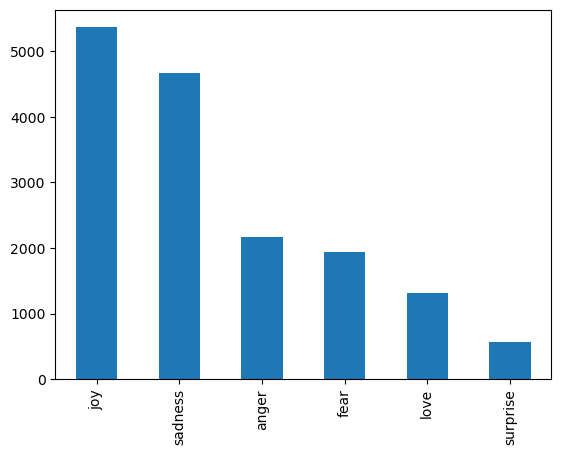

In [11]:
df['label'].value_counts().plot(kind='bar')

In [12]:
#Explortion
from textblob import TextBlob

In [13]:
def get_sentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment > 0:
        result="Positive"
    elif sentiment< 0:
        result='Negative'
    else:
            result="Neutral"
    return result

In [14]:
get_sentiment("I love hanging out")

'Positive'

In [15]:
df['sentiment']=df['sentence'].apply(get_sentiment)

In [16]:
df.head()

,sentence,label,sentiment
0,i didnt feel humiliated,sadness,Neutral
1,i can go from feeling so hopeless to so damned...,sadness,Neutral
2,im grabbing a minute to post i feel greedy wrong,anger,Negative
3,i am ever feeling nostalgic about the fireplac...,love,Negative
4,i am feeling grouchy,anger,Neutral


In [17]:
df.groupby(['label','sentiment']).size()

label     sentiment
anger     Negative     1048
          Neutral       545
          Positive      567
fear      Negative      871
          Neutral       452
          Positive      614
joy       Negative      590
          Neutral       776
          Positive     3997
love      Negative      245
          Neutral       179
          Positive      881
sadness   Negative     2207
          Neutral      1165
          Positive     1296
surprise  Negative      233
          Neutral        60
          Positive      279
dtype: int64

<AxesSubplot:xlabel='label,sentiment'>

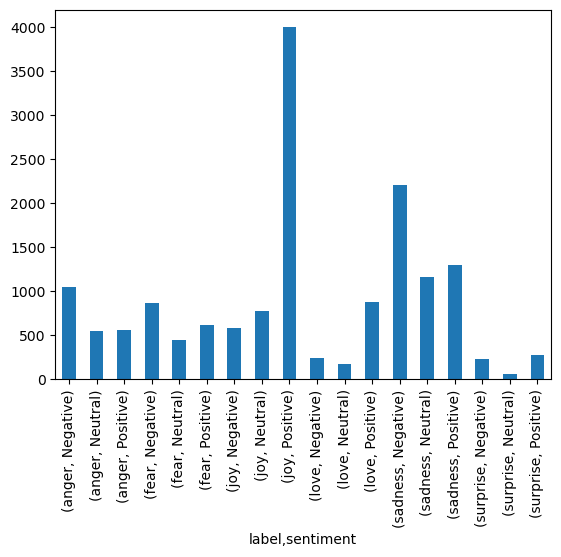

In [18]:
df.groupby(['label','sentiment']).size().plot(kind='bar')

c:\Users\DELL\anaconda3\envs\Ironhack\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\DELL\anaconda3\envs\Ironhack\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


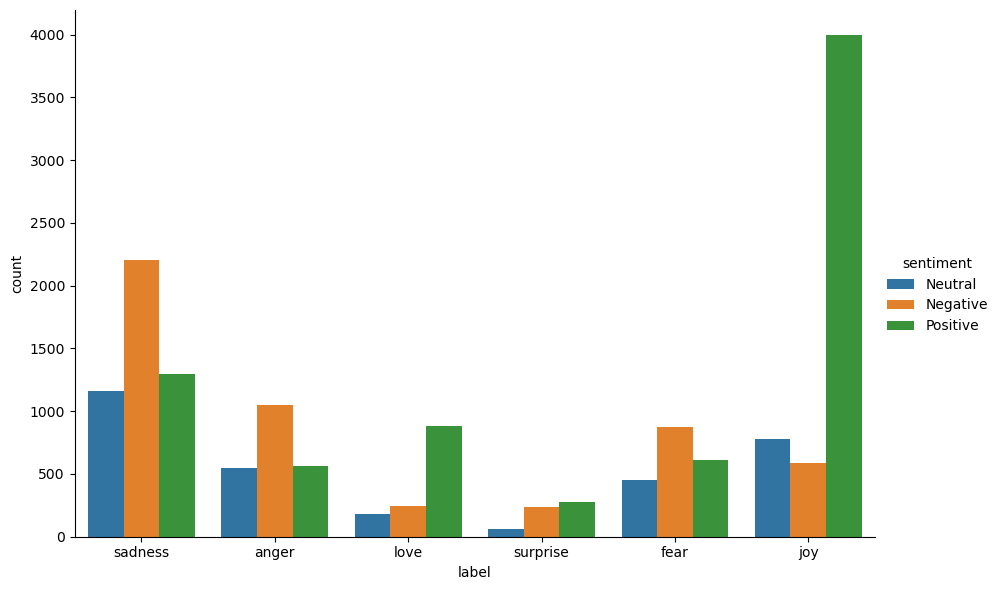

In [19]:
sns.factorplot(x="label",hue='sentiment',data=df,kind='count',size=6,aspect=1.5)

In [20]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [21]:
df['clean_text']=df['sentence'].apply(nfx.remove_stopwords)

In [22]:
df['clean_text']=df['sentence'].apply(nfx.remove_punctuations)

In [23]:
df['clean_text']=df['sentence'].apply(nfx.remove_userhandles)

In [24]:
df.drop(columns=['sentence'],inplace=True)

In [25]:
df

,label,sentiment,clean_text
0,sadness,Neutral,i didnt feel humiliated
1,sadness,Neutral,i can go from feeling so hopeless to so damned...
2,anger,Negative,im grabbing a minute to post i feel greedy wrong
3,love,Negative,i am ever feeling nostalgic about the fireplac...
4,anger,Neutral,i am feeling grouchy
...,...,...,...
16000,sadness,Negative,Sad
16001,sadness,Negative,Sad
16002,love,Negative,Sad
16003,anger,Negative,Sad


In [26]:
from collections import Counter
def extract_keywords(sentence,num=50):
    tokens=[tok for tok in sentence.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [27]:
emotion_list=df['label'].unique().tolist()

In [28]:
emotion_list

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

In [29]:
joy_list=df[df['label']=='joy']['clean_text']

In [30]:
joy_docx=''.join(joy_list)

In [31]:
keyword_joy=extract_keywords(joy_docx)

In [32]:
from sklearn.model_selection import train_test_split
Xfeatures=df['clean_text']
ylabels=df['label']


In [33]:
Xfeatures

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
16000                                                  Sad
16001                                                  Sad
16002                                                  Sad
16003                                                  Sad
16004                                                  Sad
Name: clean_text, Length: 16005, dtype: object

In [34]:
#vectorizer
cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [35]:
#get features by name
cv.get_feature_names()

c:\Users\DELL\anaconda3\envs\Ironhack\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaaaaaand',
 'aaaaand',
 'aaaand',
 'aac',
 'aahhh',
 'aaron',
 'ab',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abated',
 'abbigail',
 'abc',
 'abdomen',
 'abdominal',
 'abducted',
 'abelard',
 'abhorrent',
 'abide',
 'abilities',
 'ability',
 'abit',
 'able',
 'ableness',
 'abnormally',
 'aboard',
 'abominable',
 'abortion',
 'abou',
 'abound',
 'about',
 'above',
 'abraham',
 'abroad',
 'abruptly',
 'absence',
 'absolute',
 'absolutely',
 'absolutly',
 'absorbed',
 'abstain',
 'abstinence',
 'abstract',
 'absurd',
 'absurdity',
 'abt',
 'abundance',
 'abundantly',
 'abuse',
 'abused',
 'abuses',
 'abusing',
 'abusive',
 'abyss',
 'ac',
 'academia',
 'academic',
 'academics',
 'academy',
 'acause',
 'accelerated',
 'accent',
 'accentuating',
 'accept',
 'acceptable',
 'acceptance',
 'acceptances',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessaries',
 'accessibility',
 'accessories',
 'accessory',
 'accident',
 'accidentally',
 'accidents',
 'accl

In [36]:
#To dense array (NUmpy)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
import pickle 
pickle.dump(cv, open('count_vect.p', 'wb'))

In [38]:
##split dataset
X_train,X_test,y_train,y_test=train_test_split(X,ylabels,test_size=0.3,random_state=42)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
              


In [40]:
# Build our Model
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [41]:
## save the model 

pickle.dump(nv_model, open('naive_bayes.p', 'wb'))

In [42]:
## Accuracy
##method
nv_model.score(X_test,y_test)

0.722615576842982

In [43]:
#prediction
y_pred_for_nv=nv_model.predict(X_test)

In [44]:
y_pred_for_nv

array(['sadness', 'joy', 'sadness', ..., 'anger', 'sadness', 'sadness'],
      dtype='<U8')

In [45]:
## Make a single prediction
# Vectorized our text
# Applied our model
sample_text=["he hates running"]

In [46]:
vect=cv.transform(sample_text).toarray()

In [47]:
## Make prediction
nv_model.predict(vect)

array(['sadness'], dtype='<U8')

In [48]:
# check for the prediction probability(percentage) confidence score
nv_model.predict_proba(vect)

array([[0.0774973 , 0.12016785, 0.15991264, 0.13754323, 0.49902052,
        0.00585846]])

In [49]:
## get all class for our model
nv_model.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8')

In [50]:
np.max(nv_model.predict_proba(vect))

0.4990205214828593

In [51]:
def predict_emotion(sample_text,cv,model):
    myvect=cv.transform(sample_text).toarray()
    prediction=model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print("prediction:{},prediction Score{}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [52]:
predict_emotion(sample_text,nv_model)

TypeError: predict_emotion() missing 1 required positional argument: 'model'

In [ ]:
predict_emotion(["he hates running all day"],nv_model)

AttributeError: 'MultinomialNB' object has no attribute 'pred_proba'

In [ ]:
# Model evaluation
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.14      0.08      0.10       645
        fear       0.09      0.05      0.06       563
         joy       0.33      0.45      0.38      1617
        love       0.09      0.02      0.03       418
     sadness       0.29      0.40      0.34      1382
    surprise       0.00      0.00      0.00       177

    accuracy                           0.28      4802
   macro avg       0.16      0.17      0.15      4802
weighted avg       0.23      0.28      0.25      4802



In [ ]:
## Confusion matrix
confusion_matrix(y_test,y_pred_for_nv)


array([[ 53,  36, 299,  13, 243,   1],
       [ 44,  26, 247,   5, 241,   0],
       [145, 109, 726,  33, 600,   4],
       [ 31,  23, 192,   8, 163,   1],
       [102,  78, 627,  21, 550,   4],
       [ 16,   9,  78,   5,  69,   0]], dtype=int64)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

<Figure size 1500x1000 with 0 Axes>

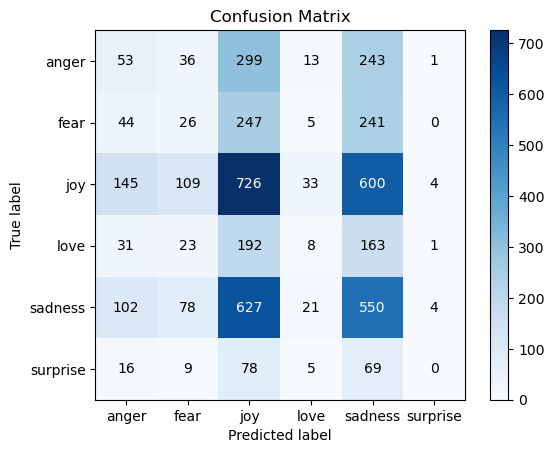

In [ ]:
plt.figure(figsize=(15,10))
plot_confusion_matrix(y_test,y_pred_for_nv)

In [ ]:
### Save Model
import joblib

In [ ]:
model_file=open("emotion_classfier_nv_model.pkl",'wb')
joblib.dump(nv_model,model_file)
model_file.close()

In [ ]:
## Model interpretation
#Logistic regression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

c:\Users\DELL\anaconda3\envs\Ironhack\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Accuracy
lr_model.score(X_test,y_test)

0.8817159516867972

In [ ]:
#single predict
predict_emotion(sample_text,lr_model)

AttributeError: 'LogisticRegression' object has no attribute 'pred_proba'

In [ ]:
#Interpret Model
import eli5

In [ ]:
#show the weights for each class/labels
eli5.show_weights(lr_model,top=20)

In [ ]:
class_names=ylabels.unique().tolist()

In [ ]:
features_names=cv.get_feature_names()

c:\Users\DELL\anaconda3\envs\Ironhack\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
eli5.show_weights(lr_model,feature_names=features_names,target_names=class_names)